### Notebook for checking the characteristics of the data

##### 0.0 Loading the data  and content identification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from typing import Tuple

In [2]:
pd.plotting.register_matplotlib_converters()
data = pd.read_csv('../data/train.csv', index_col='PassengerId', sep=';', decimal='.', parse_dates=True, infer_datetime_format=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
798,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
799,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
800,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


###### Comments:
- data size is 802 records vs 10 features (dataset is not a big one)
- index_col is PassengerID (unique identifier)
- target variable is 'Survived', I assume that 1 means survived and 0 not (although 0 is a success number in informatics)
- there are missing values present 
- perhaps Name wont be informative and some variables would be highly correlated
- SibSp means number of Siblings / Spouse on board
- ParCh means number of Parents / Children on board
- Some tickets includes prefixes, this is supsicious and requires futher analysis/decomposition

###### 0.1 Single variable analysis

In [3]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

###### Comments:
- valuable notice is that there are multiple object types

In [4]:
def decompose_ticket(value: str) -> Tuple[str, int]:
    """Auxiliary function to decompose Ticket and retrieve its str prefix and int ticket number."""
    ticket = value.rsplit(" ", 1)
    has_prefix = False
    ticket_number = None
    
    # ticket can be composed of its prefix and number
    if len(ticket) > 1:
        has_prefix = True
        ticket_number = int(ticket[1])
    elif ticket[0].isdigit():
        ticket_number = int(ticket[0])
    # there might be a ticket that does not contain a number
    else:
        has_prefix = True
        
    return (has_prefix, ticket_number)

data[['Ticket_has_prefix', 'Ticket_number']] = pd.DataFrame(data['Ticket'].map(decompose_ticket).tolist())
data = data.drop('Ticket', axis=1)

In [5]:
survived = data.loc[data['Survived'] == 1]
not_survived = data.loc[data['Survived'] == 0]

In [6]:
survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number
count,303.0,303.000000,261.000000,303.000000,303.000000,303.000000,3.010000e+02
mean,1.0,1.910891,28.577931,0.462046,0.462046,50.421577,2.768247e+05
std,0.0,0.862374,15.014521,0.674300,0.730856,68.501810,6.189611e+05
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,5.410000e+02
25%,1.0,1.000000,19.000000,0.000000,0.000000,13.000000,1.426300e+04
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000,1.122770e+05
75%,1.0,3.000000,37.000000,1.000000,1.000000,64.179150,3.470780e+05
max,1.0,3.000000,80.000000,4.000000,3.000000,512.329200,3.101316e+06


In [7]:
not_survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number
count,499.0,499.000000,385.000000,499.000000,499.000000,499.000000,4.960000e+02
mean,0.0,2.531062,31.090909,0.513026,0.320641,21.507947,3.136517e+05
std,0.0,0.731215,14.018015,1.271139,0.807467,30.429846,6.856462e+05
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200,1.698250e+04
50%,0.0,3.000000,29.000000,0.000000,0.000000,10.462500,1.120555e+05
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000,3.470880e+05
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,3.101317e+06


###### Comments:
- train dataset is unbalanced, 
- people who are more likely to survive have lower age, paid higher fare(higher class), have higher Parch(children)

In [8]:
data.loc[(data['Ticket_has_prefix'] == True)].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number
count,204.000000,204.000000,156.000000,204.000000,204.000000,204.000000,2.000000e+02
mean,0.377451,2.284314,30.953526,0.563725,0.397059,29.353084,4.432517e+05
std,0.485942,0.840800,15.165586,1.191455,0.922724,35.586714,1.054867e+06
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,3.000000e+00
25%,0.000000,1.750000,20.000000,0.000000,0.000000,8.050000,3.976250e+03
50%,0.000000,3.000000,29.000000,0.000000,0.000000,15.372900,1.757200e+04
75%,1.000000,3.000000,42.000000,1.000000,0.000000,30.625000,3.192100e+04
max,1.000000,3.000000,71.000000,8.000000,6.000000,263.000000,3.101317e+06


In [9]:
data.loc[(data['Ticket_has_prefix'] == True) & (data['Survived'] == 1)].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number
count,77.0,77.000000,62.000000,77.000000,77.000000,77.000000,7.500000e+01
mean,1.0,1.857143,29.012097,0.558442,0.337662,42.159091,4.296160e+05
std,0.0,0.854004,15.058930,0.697618,0.661147,41.580260,1.055911e+06
min,1.0,1.000000,0.750000,0.000000,0.000000,7.733300,5.410000e+02
25%,1.0,1.000000,19.000000,0.000000,0.000000,13.500000,5.735000e+03
50%,1.0,2.000000,28.500000,0.000000,0.000000,26.287500,1.748300e+04
75%,1.0,3.000000,40.000000,1.000000,0.000000,51.862500,1.917500e+04
max,1.0,3.000000,58.000000,4.000000,2.000000,227.525000,3.101316e+06


In [10]:
data.loc[(data['Ticket_has_prefix'] == False)].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number
count,597.000000,597.000000,489.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,0.378559,2.299832,29.791595,0.470687,0.366834,33.524999,2.516669e+05
std,0.485435,0.838793,14.260518,1.046516,0.728913,54.581051,4.504985e+05
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,6.930000e+02
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,2.416000e+04
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.791700,2.336390e+05
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.477430e+05
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200,3.101298e+06


In [11]:
data.loc[(data['Ticket_has_prefix'] == False) & (data['Survived'] == 1)].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number
count,226.0,226.000000,199.000000,226.000000,226.000000,226.000000,2.260000e+02
mean,1.0,1.929204,28.442663,0.429204,0.504425,53.236671,2.261197e+05
std,0.0,0.866326,15.036141,0.664554,0.749802,75.386086,3.657307e+05
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,6.950000e+02
25%,1.0,1.000000,19.000000,0.000000,0.000000,13.000000,1.989525e+04
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000,2.311760e+05
75%,1.0,3.000000,36.000000,1.000000,1.000000,64.589575,3.470880e+05
max,1.0,3.000000,80.000000,4.000000,3.000000,512.329200,3.101295e+06


##### Comments:
- by comparing above statistics it is possible to notice that tickets prefix has no noticable correlation with a survival of the passenger 
- statistics(for example mean) and proportions of the above sets are comparable. 
- only difference lies within ticket number, as this one is higher for group with prefixes

##### 0.2 Missing values

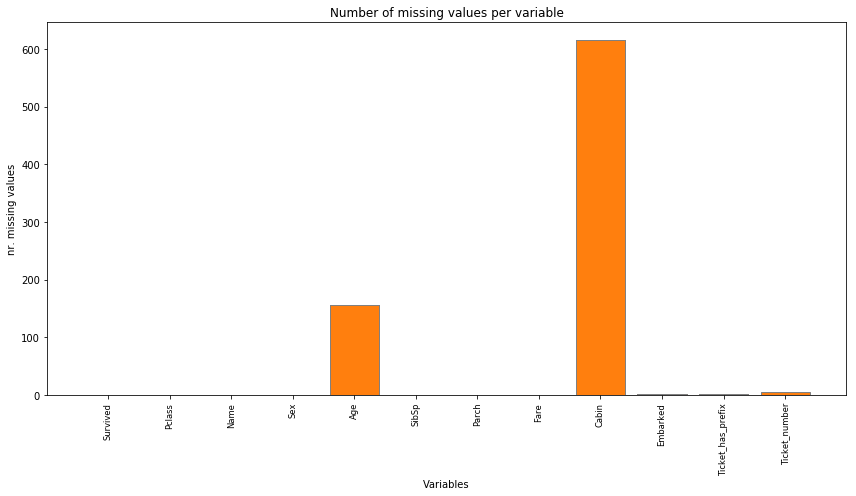

In [12]:
def bar_chart(ax: plt.axes, xvalues: list, yvalues: list, title: str, xlabel: str, ylabel: str, percentage=False):
    """Function to draw bar charts."""
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xvalues, rotation=90, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.bar(xvalues, yvalues, edgecolor='grey')

def plot_missing_values(data: pd.DataFrame):
    fig = plt.figure(figsize=(12,7))
    mv = {}
    for var in data:
        mv[var] = data[var].isna().sum()
        bar_chart(plt.gca(), mv.keys(), mv.values(), 'Number of missing values per variable', 'Variables', 'nr. missing values')
    fig.tight_layout()
    plt.show()
    
plot_missing_values(data)

###### Comments:
- there is high number of missing values for 'Cabin' variable, this feature will be dropped
- the missing values for 'Age' will be injected as a mean value of the feature
- records with empty records for 'Emabrked', 'Ticket_has_prefix', 'Ticket_number' will be dropped

In [13]:
# inject into 'Age' missing value its mean
data['Age'] = data['Age'].fillna(value = data['Age'].mean())

In [14]:
# drop cabin
data = data.drop('Cabin', axis=1)

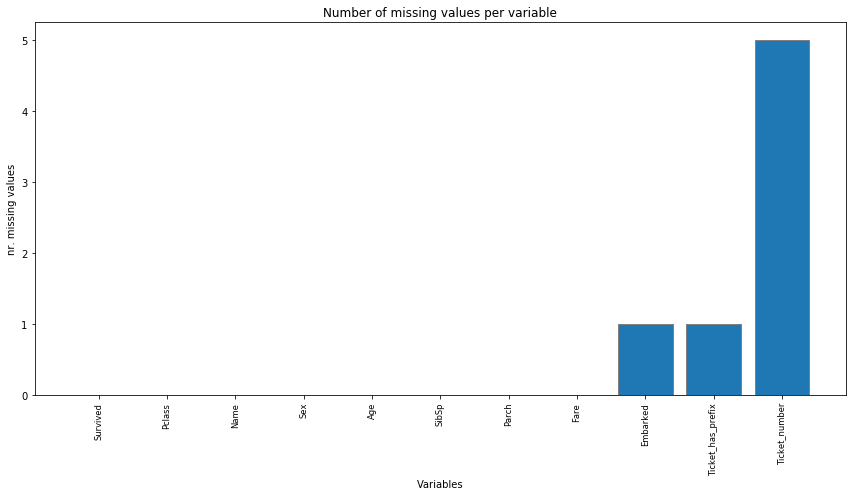

In [15]:
# remaining missing records to drop
plot_missing_values(data)

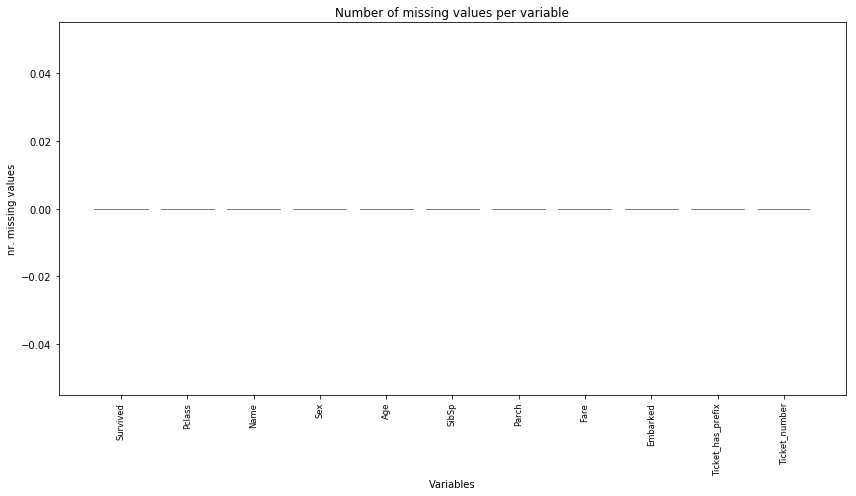

In [16]:
data = data.dropna()
plot_missing_values(data)

In [17]:
# change data types
data = data.astype({'Age': 'int32', 
                    'Ticket_number': 'int64', 
                    'Ticket_has_prefix': 'bool', 
                    'Sex': 'category', 
                    'Embarked': 'category'})
data.dtypes

Survived                int64
Pclass                  int64
Name                   object
Sex                  category
Age                     int32
SibSp                   int64
Parch                   int64
Fare                  float64
Embarked             category
Ticket_has_prefix        bool
Ticket_number           int64
dtype: object

In [18]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_has_prefix,Ticket_number
PassengerId,,,,,,,,,,,
1,0,3,"Celotti, Mr. Francesco",male,24,0,0,8.0500,S,False,343276
2,0,3,"Christmann, Mr. Emil",male,29,0,0,8.0500,S,False,347466
3,0,3,"Andreasson, Mr. Paul Edvin",male,20,0,0,7.8542,S,True,5734
4,0,1,"Chaffee, Mr. Herbert Fuller",male,46,1,0,61.1750,S,True,2315
5,0,3,"Dean, Mr. Bertram Frank",male,26,1,2,20.5750,S,False,364500
...,...,...,...,...,...,...,...,...,...,...,...
797,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,29.1250,Q,False,211536
798,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S,False,112053
799,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S,True,6607


##### 0.3 Variable distribution 

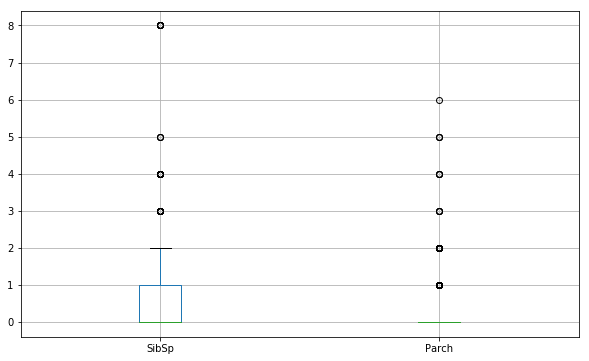

In [19]:
# SibSp and Parch value distribution
data[['SibSp', 'Parch']].boxplot(figsize=(10,6))
plt.show() 

<Figure size 432x288 with 0 Axes>

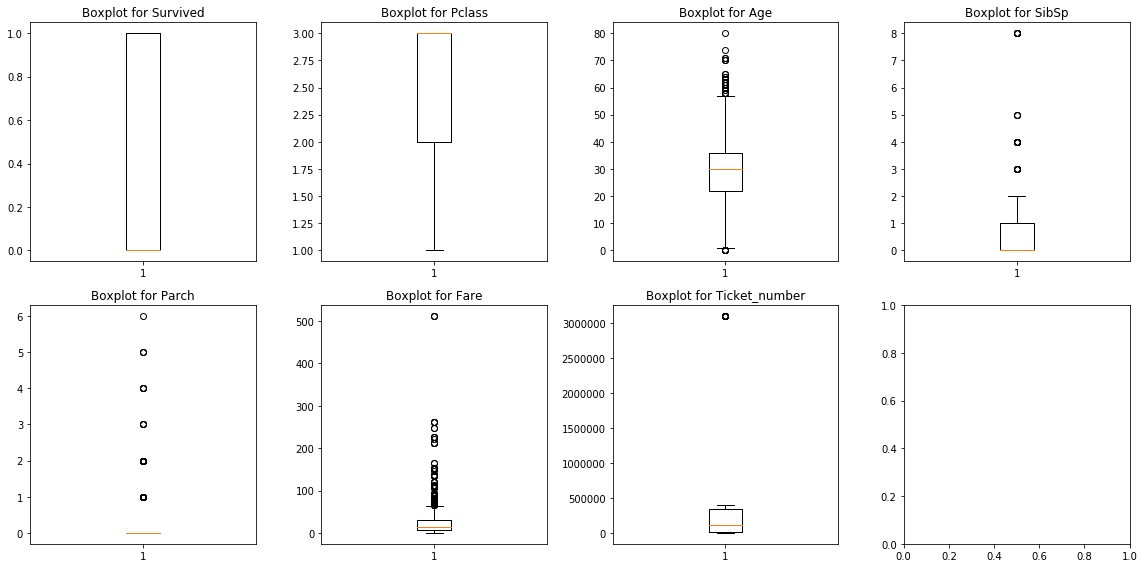

In [20]:
def choose_grid(nr):
    return nr // 4 + 1, 4

# plot chart for all numeric values
columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

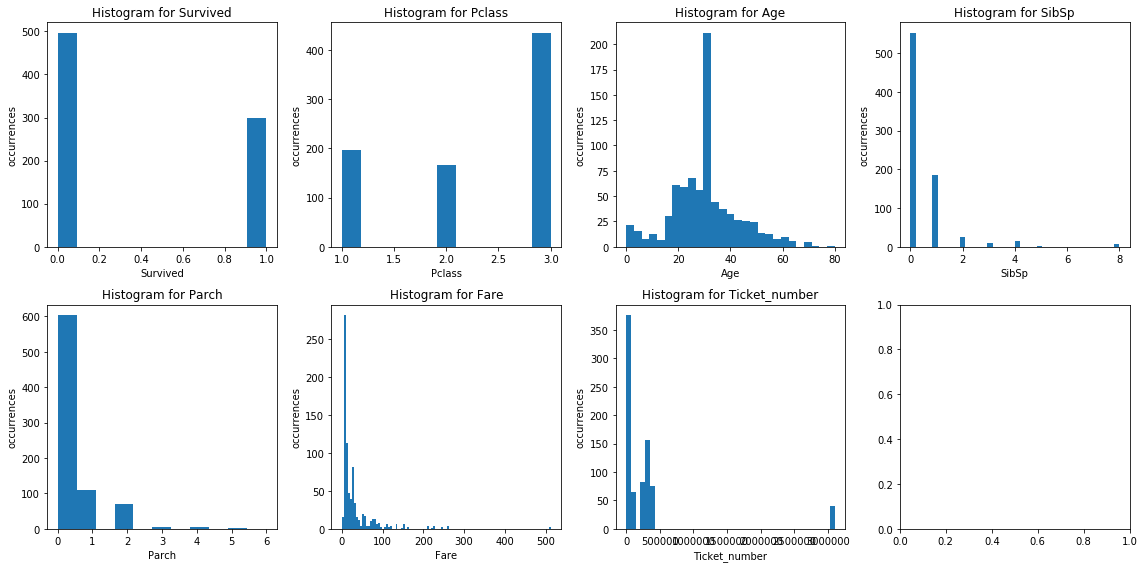

In [21]:
# plot histogram for each numeric variable
columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("occurrences")
    axs[i, j].hist(data[columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

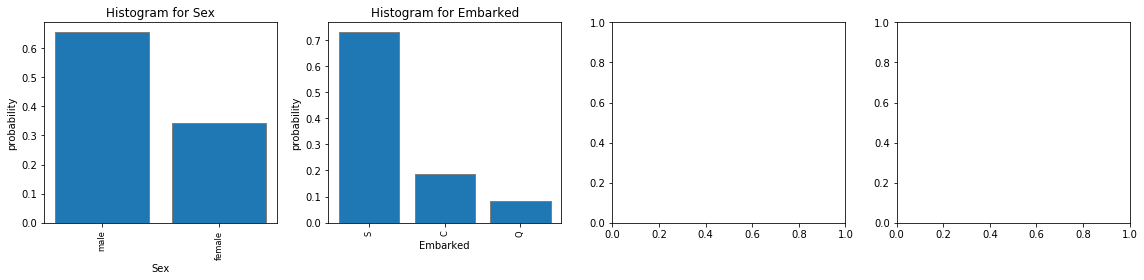

In [22]:
# histogram for categorical variables
columns = data.select_dtypes(include='category').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    counts = data[columns[n]].dropna().value_counts(normalize=True)
    bar_chart(axs[i, j], counts.index, counts.values, 'Histogram for %s'%columns[n], columns[n], 'probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

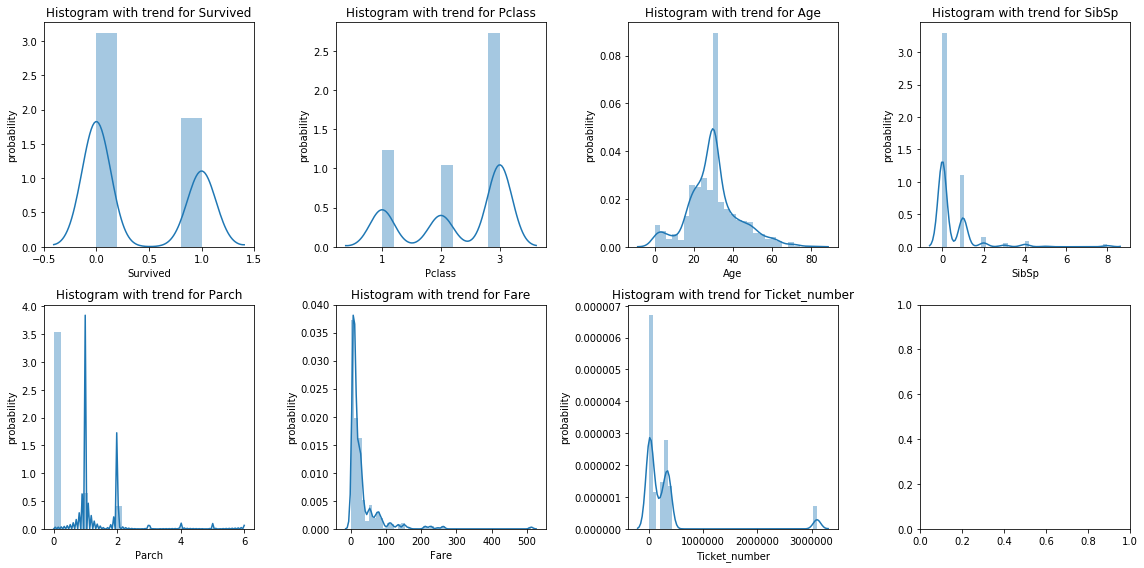

In [23]:
# plot distributton fitted to the variable
columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(data[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

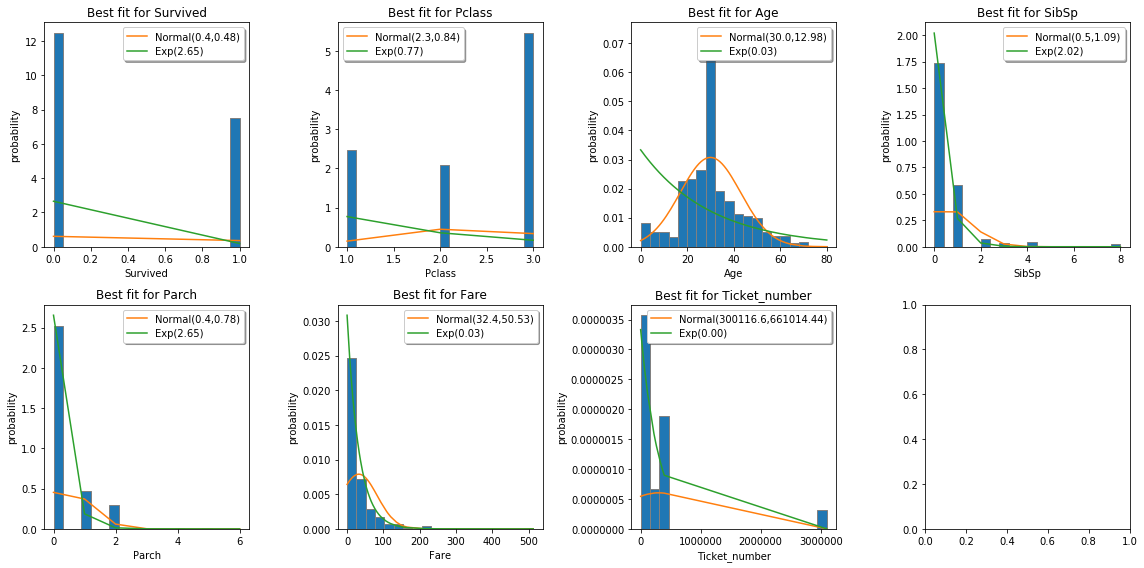

In [24]:
import scipy.stats as _stats 
# attempt to fit some known distributions to the data using scipy.stats

def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
#    sigma, loc, scale = _stats.lognorm.fit(x_values)
#    distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')
    
def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True)

columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

###### Comments:
- thanks to the diagrams we understand data better 
- we learned which values are dominant for given variable 
- inejcting mean value for missing age value significantly affected the distribution (it would be valuable to try a filling missing values with different approach - for example meadian or previous encountered value) 

##### 0.4 Granurality

<Figure size 432x288 with 0 Axes>

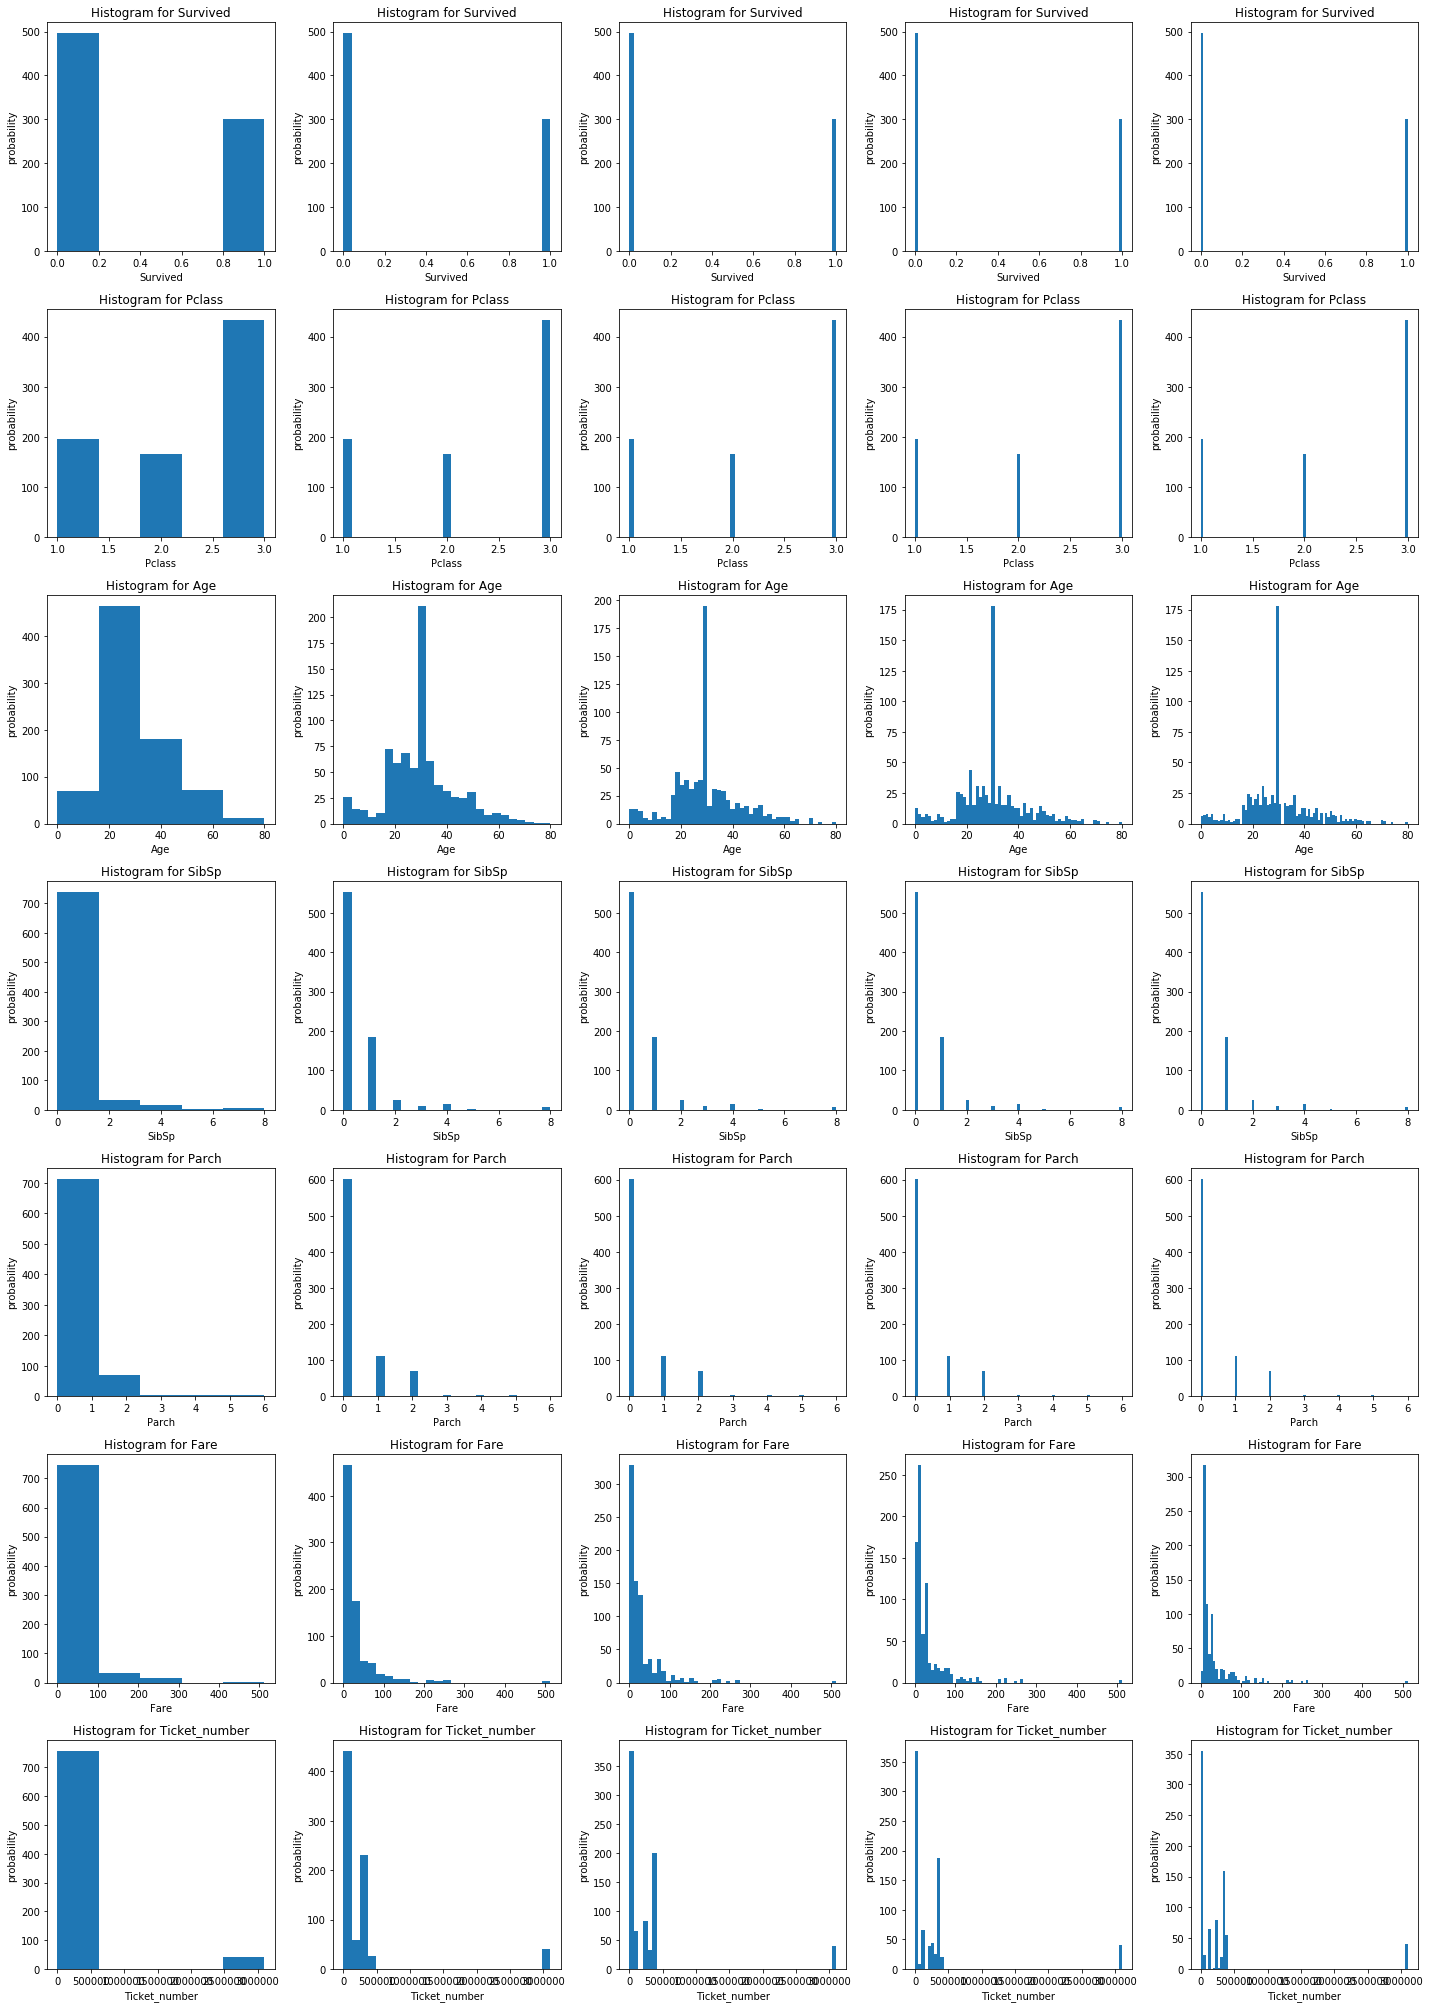

In [25]:
# check data granularity for 5 different number of bins
columns = data.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        axs[i, j].set_title('Histogram for %s'%columns[i])
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel("probability")
        axs[i, j].hist(data[columns[i]].dropna().values, bins[j])
fig.tight_layout()
plt.show()

#### Multivariate analysis

##### 0.6 Sparsity

<Figure size 432x288 with 0 Axes>

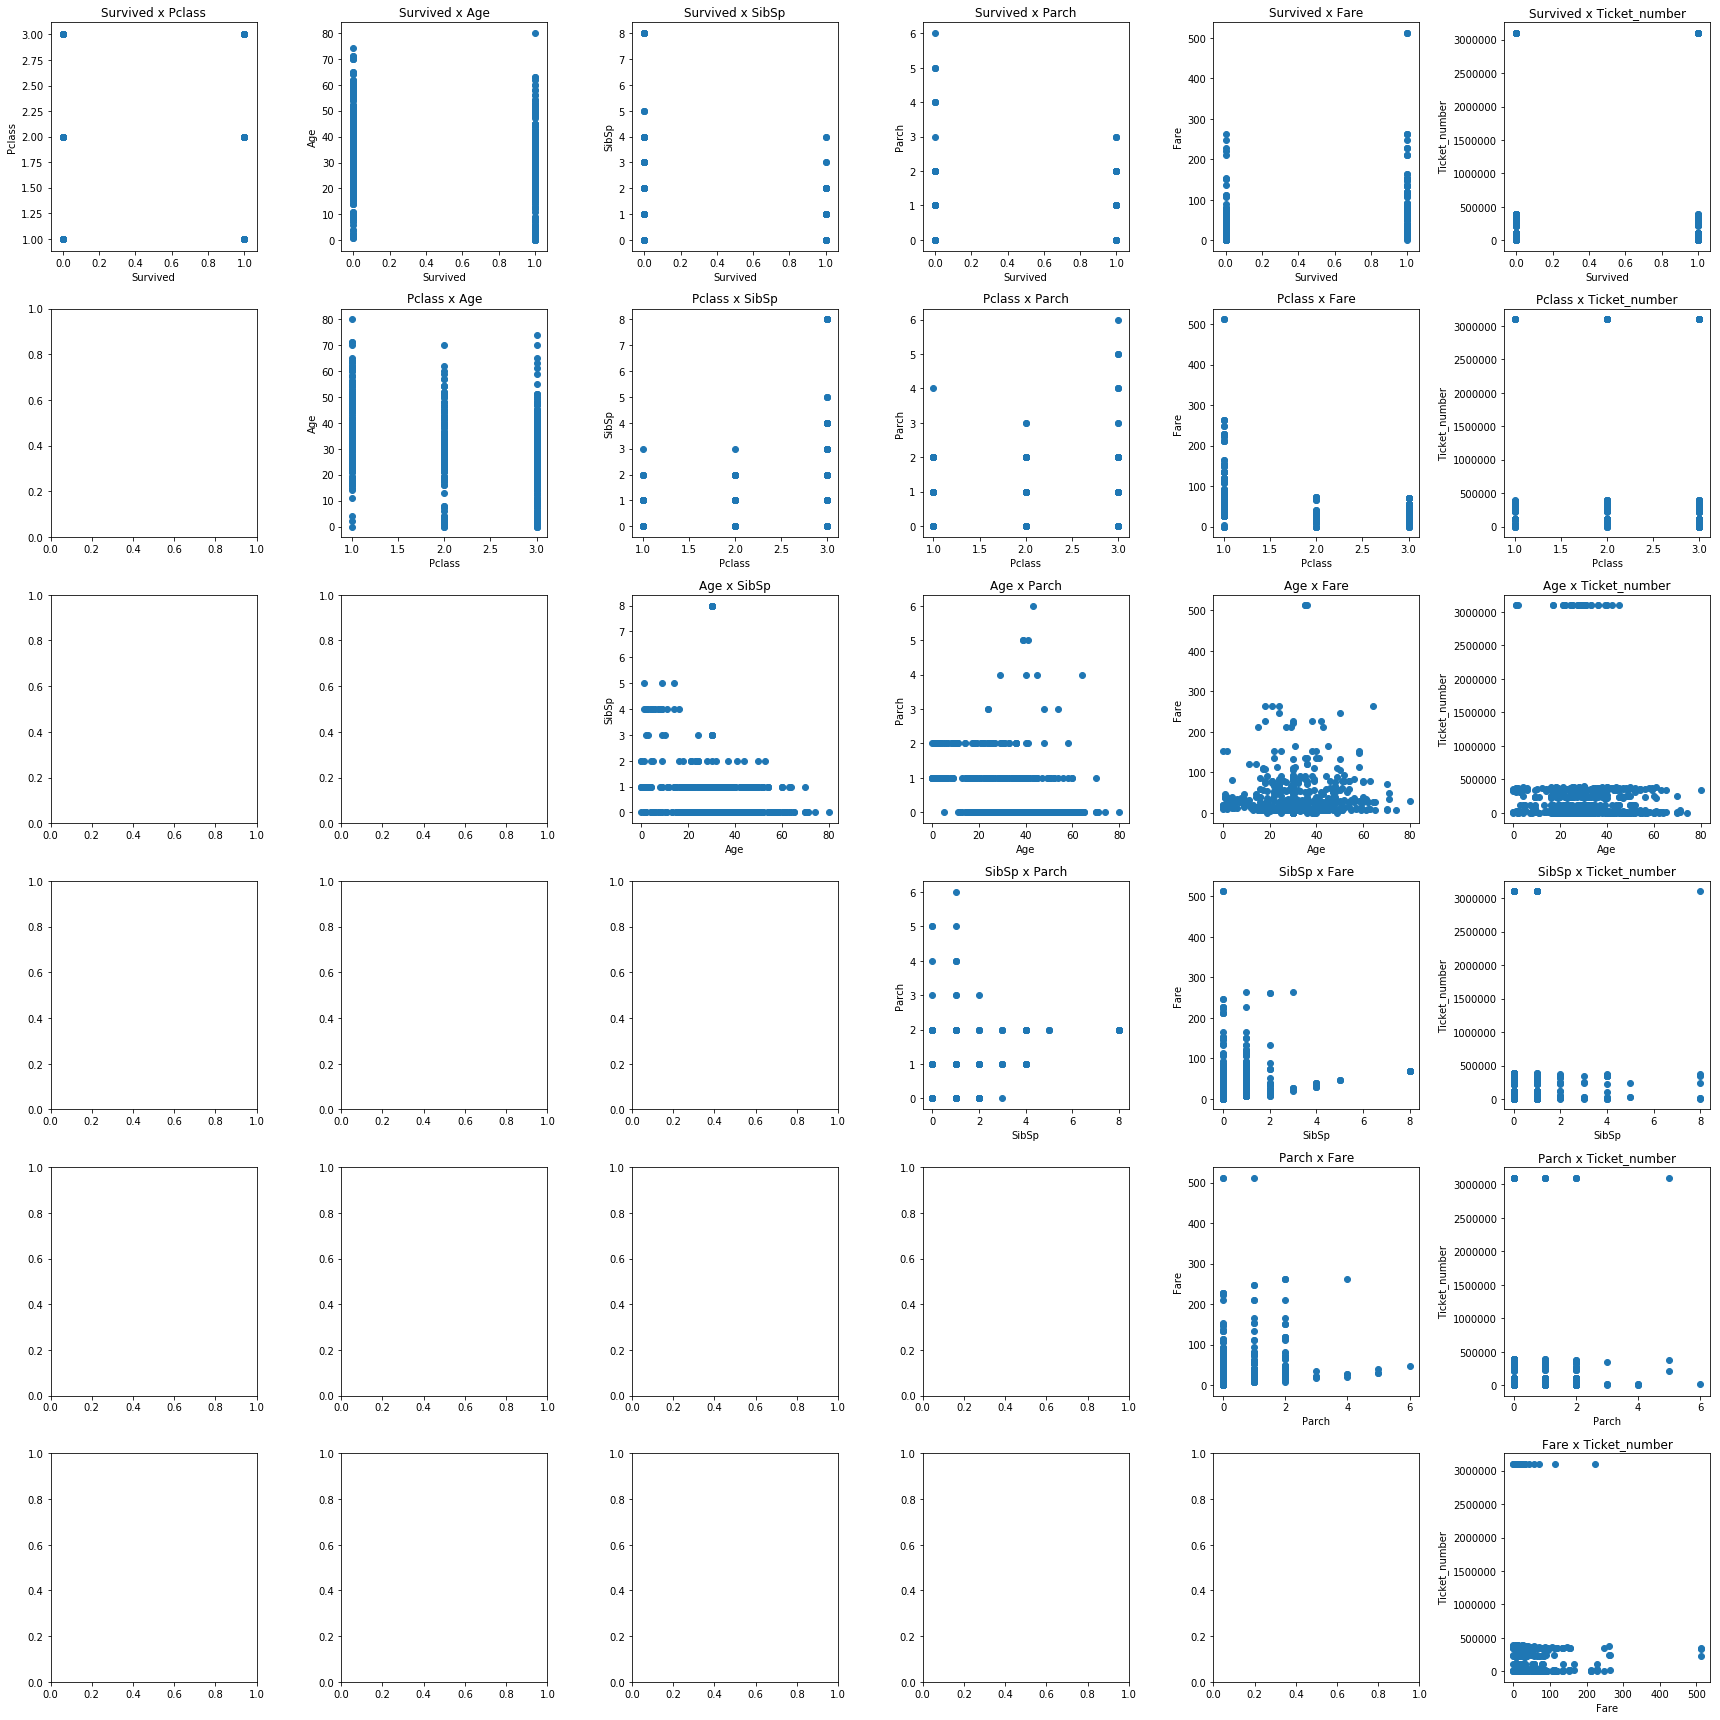

In [26]:
# analysis of a sparsity of the data along two of its defining variables
columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

###### Comments:
- for this dataset we do not get much from the analysis of a sparsity, its due to the data characteristic. In some of the cases we could search for liner regression between variables

##### 0.7 Correlation analysis

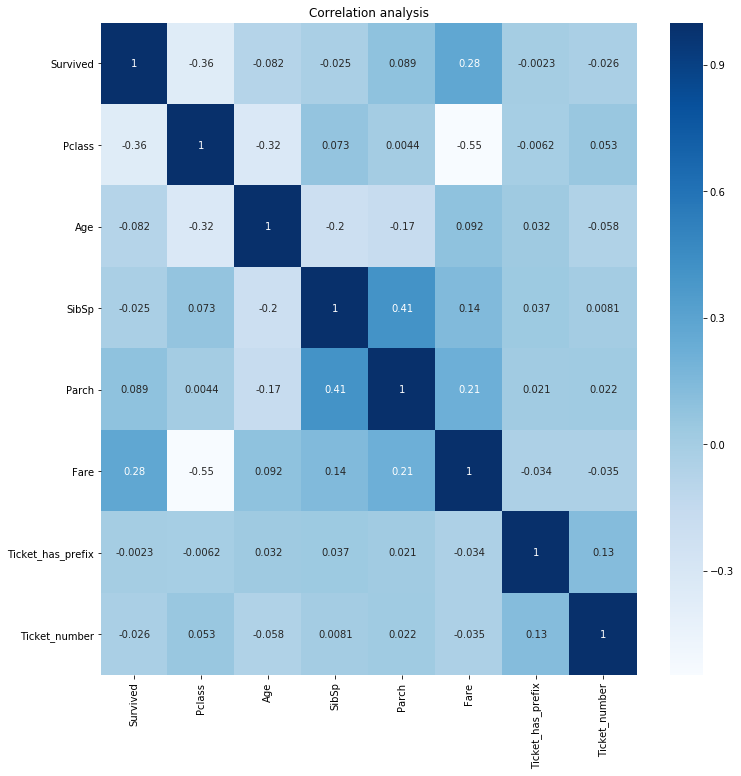

In [27]:
# correlation analysis to define and get rid of most correleated features
fig = plt.figure(figsize=[12, 12])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()